In [1]:
%reload_ext autoreload
%autoreload 2

from contest import *

In [2]:
neighbours(1, 1)

[(0, 1), (1, 0), (1, 2), (2, 1)]

In [4]:
from scipy.spatial.distance import euclidean
euclidean([1, 2], [1, 2])

0.0

In [18]:
d = np.array([[0,0,-1],
             [0,0,0], [-1,0,0]])

np.argwhere(d == d.min())
#list(np.where(d == d.min()))

array([[0, 2],
       [2, 0]], dtype=int64)

0

[(0, (10, 1)), (1, (9, 2)), (2, (10, 2)), (3, (8, 3)), (4, (9, 3)), (5, (7, 4)), (6, (8, 4)), (7, (5, 5)), (8, (6, 5)), (9, (7, 5)), (10, (5, 6)), (11, (6, 6))]


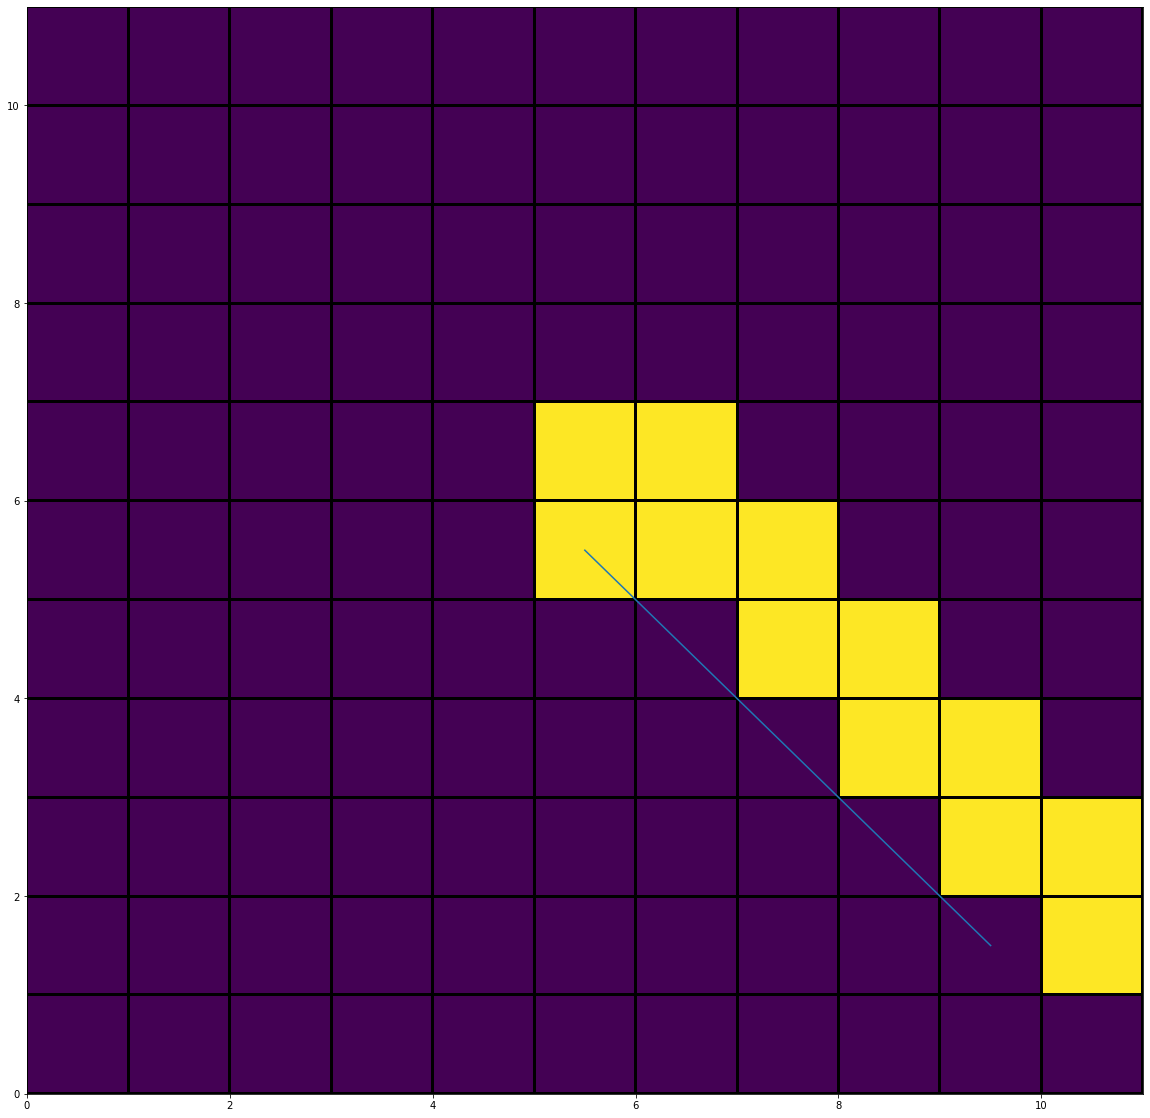

In [187]:
import numpy as np
import math
import matplotlib.pyplot as plt

def gasser_kahlhofer(origin, direction, shape):
    ox, oy = origin
    dx, dy = direction

    maxx, maxy = shape
    
    # direction indicator
    positivex = dx > 0
    positivey = dy > 0

    cells = {(int(math.floor(ox)), int(math.floor(oy)))}

    px = int(math.ceil(ox))
    while (positivex and px < maxx) or (not positivex and px > 0):
        lmb = (px - ox) / dx
        py = oy + lmb * dy

        is_cross = py % 1 == 0
        py = int(math.floor(py)) if positivey else int(math.floor(py + 1))

        if py >= maxy or py < 0:
            break

        cells.add((px, py))
        if is_cross and False:
            cells.add((px - positivex, py))

        px += 1 if positivex else - 1

    py = int(math.ceil(oy))
    while (positivey and py < maxy) or (not positivey and py > 0):
        lmb = (py - oy) / dy
        px = ox + lmb * dx

        is_cross = px % 1 == 0
        px = int(math.floor(px)) if positivex else int(math.floor(px + 1))

        if px >= maxx or px < 0:
            break

        cells.add((px, py))
        if is_cross and False:
            cells.add((px - positivex, py))

        py += 1 if positivey else -1

    # lmb = (px - ox) / dx
    # lmb = (py - oy) / dy

    # px = ox + lmb * dx
    # py = oy + lmb * dy

    return list(cells)

def get_dominance(direction): # 0: x, 1: y
    dx, dy = direction
    if dx > dy:
        return 0
    elif dy > dx:
        return 1
    else:
        return 0
    
def iter_in_dominance(cells, dominance): # 0: x, 1: y
    if dominance == 1:
        return sorted(cells, key=lambda e: (e[0], e[1]))
    else:
        return sorted(cells, key=lambda e: (e[1], e[0]))

dim = [11, 11]
a = np.zeros(dim)

origin = np.array([5.5, 5.5])
direction = np.array([1, -1])

gk = gasser_kahlhofer(origin, direction, a.shape)
#print(gk)

for i in gk:
    a[i] = 1

print(list(enumerate(iter_in_dominance(gk, get_dominance(direction)))))
    
plt.figure(figsize=(20, 20))
plt.pcolormesh(a.T, linewidth=2, edgecolors='k')
plt.plot(*list(zip(origin, origin + 4 * direction)))
plt.show()

# 1 2 2 2 3 2 2 3 3 3 4 3 5 3 6 3 5 4 6 4 7 4 8 4 9 4 8 5 9 5 10 5

In [42]:
list(zip(origin, origin + direction))

[(1, 4), (2, 3)]

In [43]:
origin, origin + direction

(array([1, 2]), array([4, 3]))